# Example usage for "movekit"

In [143]:
import movekit as mkit
import numpy as np
import os

### Read in CSV file

In [61]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [62]:
# Read in CSV file using appropriate method-
data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


#### Preprocess the data

In [63]:
preprocessed_data = mkit.preprocess(data)


 Number of missing values = y            0
x            0
animal_id    0
time         0
dtype: int64



#### Linear interpolation

In [56]:
interp_dat = data
interp_dat['x'][2] = np.nan
interp_dat['y'][3] = np.nan

interp_dat.head()

C:\Users\lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,NaN,405.89
3,1,811,445.15,NaN
4,1,905,366.06,451.76


In [ ]:
src.mov

In [33]:
res = mkit.linear_interpolation(interp_dat, 2)
print(res)

AttributeError: module 'movekit' has no attribute 'linear_interpolation'

#### Extract features

In [6]:
data_features = mkit.extract_features(preprocessed_data, fps = 10)
data_features.head(20)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped
0,1,312,405.29,417.76,0.000000,0.000000,0.000000,0.000000,0
1,2,312,405.31,417.37,0.390512,0.000000,0.000000,-87.064327,0
2,3,312,405.31,417.07,0.300000,0.000000,0.000000,-90.000000,0
3,4,312,405.30,416.86,0.210238,0.000000,0.000000,-92.726311,0
4,5,312,405.29,416.71,0.150333,0.000000,0.000000,-93.814075,0
5,6,312,405.27,416.61,0.101980,0.000000,0.000000,-101.309932,0
6,7,312,405.27,416.54,0.070000,0.000000,0.000000,-90.000000,0
7,8,312,405.27,416.49,0.050000,0.000000,0.000000,-90.000000,0
8,9,312,405.31,416.37,0.126491,0.000000,0.000000,-71.565051,0
9,10,312,405.38,416.27,0.122066,0.152162,0.000000,-55.007980,1


#### Time series analysis

Possible parameters to extract time sereis features are: 

In [7]:
# For example autocorrelation 
auto_corr = mkit.ts_feature(data_features, 'autocorrelation')

Feature Extraction: 100%|██████████| 30/30 [00:01<00:00, 27.01it/s]


In [8]:
auto_corr

variable,average_acceleration__autocorrelation__lag_0,average_acceleration__autocorrelation__lag_1,average_acceleration__autocorrelation__lag_2,average_acceleration__autocorrelation__lag_3,average_acceleration__autocorrelation__lag_4,average_acceleration__autocorrelation__lag_5,average_acceleration__autocorrelation__lag_6,average_acceleration__autocorrelation__lag_7,average_acceleration__autocorrelation__lag_8,average_acceleration__autocorrelation__lag_9,...,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9
id,,,,,,,,,,,,,,,,,,,,,
312,1.0,0.973705,0.903485,0.794941,0.657646,0.500612,0.332134,0.163883,0.004863,-0.134870,...,1.0,1.000433,1.000799,1.001097,1.001328,1.001492,1.001589,1.001619,1.001585,1.001487
511,1.0,0.972421,0.903822,0.801625,0.675504,0.533282,0.382749,0.232853,0.090443,-0.036413,...,1.0,1.000432,1.000795,1.001090,1.001316,1.001472,1.001556,1.001568,1.001507,1.001375
607,1.0,0.968225,0.889882,0.775188,0.637960,0.490480,0.339141,0.194015,0.063619,-0.042812,...,1.0,1.000653,1.001235,1.001747,1.002191,1.002566,1.002874,1.003116,1.003293,1.003406
811,1.0,0.958974,0.875989,0.763612,0.634883,0.502997,0.364971,0.227156,0.099802,-0.009565,...,1.0,1.000724,1.001366,1.001928,1.002409,1.002810,1.003132,1.003375,1.003540,1.003628
905,1.0,0.964913,0.870211,0.726141,0.547292,0.349784,0.148178,-0.042093,-0.207669,-0.338110,...,1.0,1.000210,1.000370,1.000482,1.000546,1.000563,1.000537,1.000469,1.000361,1.000215


__Extract all possible time series features__ 

In [8]:
ts_features = mkit.ts_all_features(data_features)

Feature Extraction: 100%|██████████| 10/10 [00:35<00:00,  3.56s/it]


In [9]:
ts_features

variable,average_acceleration__abs_energy,average_acceleration__absolute_sum_of_changes,"average_acceleration__agg_autocorrelation__f_agg_""mean""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""median""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""var""__maxlag_40","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,y__symmetry_looking__r_0.9,y__symmetry_looking__r_0.9500000000000001,y__time_reversal_asymmetry_statistic__lag_1,y__time_reversal_asymmetry_statistic__lag_2,y__time_reversal_asymmetry_statistic__lag_3,y__value_count__value_-1,y__value_count__value_0,y__value_count__value_1,y__variance,y__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
312,0.066529,1.241241,0.025990,-0.025730,0.107966,-0.000168,0.421174,0.000101,0.000022,-0.000141,...,1.0,1.0,-77971.642077,-156842.576071,-236813.479571,0.0,0.0,0.0,14644.838227,1.0
511,0.106340,1.383138,0.000897,-0.086529,0.107008,-0.001042,0.316145,0.000122,0.000037,-0.003024,...,1.0,1.0,-90215.704386,-181516.888177,-274115.312406,0.0,0.0,0.0,19244.251098,1.0
607,0.070812,1.438458,-0.016170,-0.133832,0.099074,0.001082,0.343657,0.000086,0.000024,0.002442,...,1.0,1.0,-54841.233217,-110877.905368,-167859.854676,0.0,0.0,0.0,17028.654780,1.0
811,0.048206,1.461818,0.035383,-0.120236,0.098022,0.001738,0.223827,0.000048,0.000021,0.003446,...,1.0,1.0,-54605.532626,-109901.843012,-165981.404659,0.0,0.0,0.0,19149.768360,1.0
905,0.095643,1.628473,0.000243,-0.044027,0.106217,-0.000118,0.438369,0.000132,0.000027,0.001294,...,1.0,1.0,-114928.392800,-231110.694731,-348445.472764,0.0,0.0,0.0,23246.371565,1.0


#### Compute the Euclidean distance 

Return the normalized Euclidean distance between movers for each time step

In [10]:
res = mkit.euclidean_dist(data_features)

In [11]:
res.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,312,511,607,811,905
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,0.000000,0.055401,0.033672,0.057634,0.093339
1000,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,0.055401,0.000000,0.058181,0.112287,0.051128
2000,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,0.033672,0.058181,0.000000,0.078413,0.107066
3000,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,0.057634,0.112287,0.078413,0.000000,0.142064
4000,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,0.093339,0.051128,0.107066,0.142064,0.000000
1,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,0.000000,0.055826,0.033094,0.057732,0.094218
1001,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,0.055826,0.000000,0.058189,0.112496,0.051075
2001,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,0.033094,0.058189,0.000000,0.079105,0.107121
3001,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,0.057732,0.112496,0.079105,0.000000,0.142215
4001,2,905,365.86,451.76,0.200000,0.0,0.0,180.000000,0,0.094218,0.051075,0.107121,0.142215,0.000000


#### Plotting the data

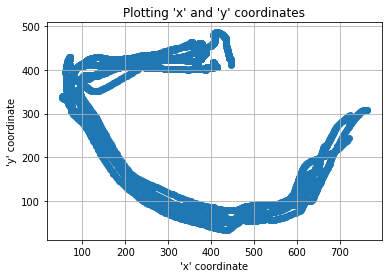

In [12]:
# plot movement 
mkit.plot_movement(data, frm=0, to = 1000)

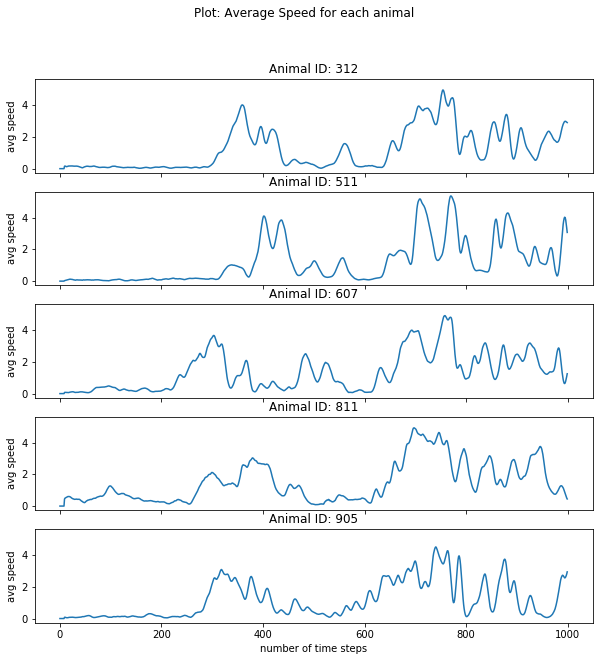

In [13]:
mkit.plot_speed(data_features)

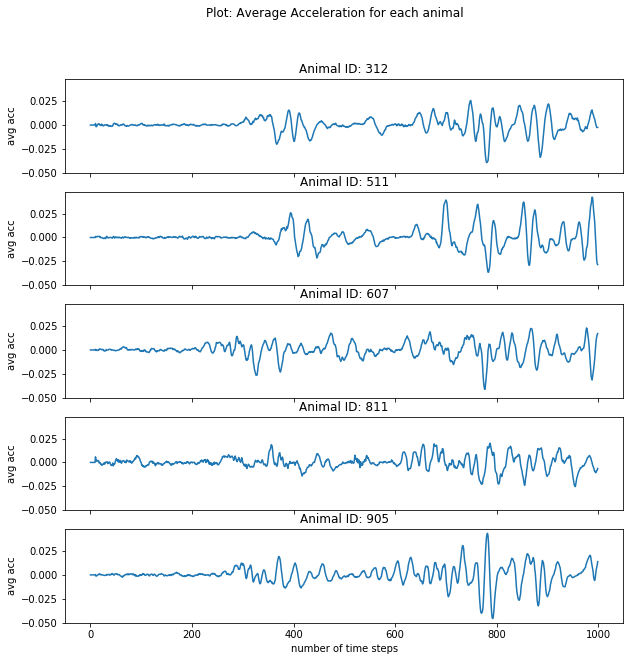

In [14]:
mkit.plot_acceleration(data_features)

#### Explore environment space of both singular animals (colored) and group of animals (black)

In [154]:
os.chdir("C:/Users/lukas/Dropbox/Movekit/src/movekit/")
sys.path.append("C:/Users/lukas/Dropbox/Movekit/src/movekit/")
import feature_extraction as fe


Area (polygon) covered by animal ID = 312 is = 139873.97 sq. units


Area (polygon) covered by animal ID = 511 is = 151556.80 sq. units


Area (polygon) covered by animal ID = 607 is = 171971.54 sq. units


Area (polygon) covered by animal ID = 811 is = 196394.24 sq. units


Area (polygon) covered by animal ID = 905 is = 151805.74 sq. units


Area (polygon) covered by animals collectively is =  214704.49029999992 sq. units


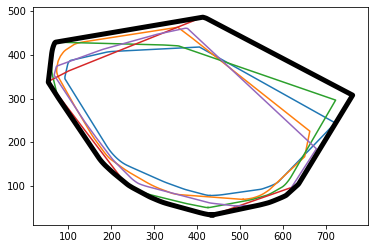

In [155]:
fe.explore_features_geospatial(preprocessed_data)

### Save to CSV

In [15]:
# save features to csv 
data_features.to_csv("fish-5-features.csv")

In [16]:
# export the time series data 
ts_features.to_json("fish-5-time-series.json")